# Regresión Lineal

### Laboratorio de Datos, IC - FCEN - UBA - 1er. Cuatrimestre 2024



### Preparando scikit-learn

Utilizaremos el módulo `scikit-learn` de Python. Para instalarlo, correr:

In [1]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     -------------------------------------- 60.6/60.6 kB 799.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.6 MB 11.2 MB/s eta 0:00:01
   - -------------------------------------- 0.4/10.6 MB 8.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/10.6 MB 6.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.6 MB 6.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.6 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/10.6 MB 6.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.6 MB 6.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/10.6 MB 5.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/10.6 MB 5.9 MB/s eta 0:00:02
   --------

Importamos los módulos de siempre, las herramientas de modelos lineales y las medidas de desempeño del modelo de `scikit-learn`:

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

### Modelo de Regresión Lineal

Queremos utilizar un modelo lineal:
$$ Y = \beta_0 + \beta_1 X $$
para intentar predecir valores continuos.

### Visualización

Con lo que hemos visto las clases anteriores, visualizar la recta que mejor aproxima a los datos en el sentido de cuadrados mínimos es relativamente sencillo con `seaborn objects`, ya que `seaborn` calcula automáticamente los valores de $\beta_0$ y $\beta_1$.

Utilizaremos el dataset _tips_ de `seaborn` y analizaremos la relación entre lo que costó la comida y la cantidad de propina.

In [9]:
datos = sns.load_dataset('tips')
display(datos)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Visualizamos los datos con `so.Plot` (repasar clase de visualización)

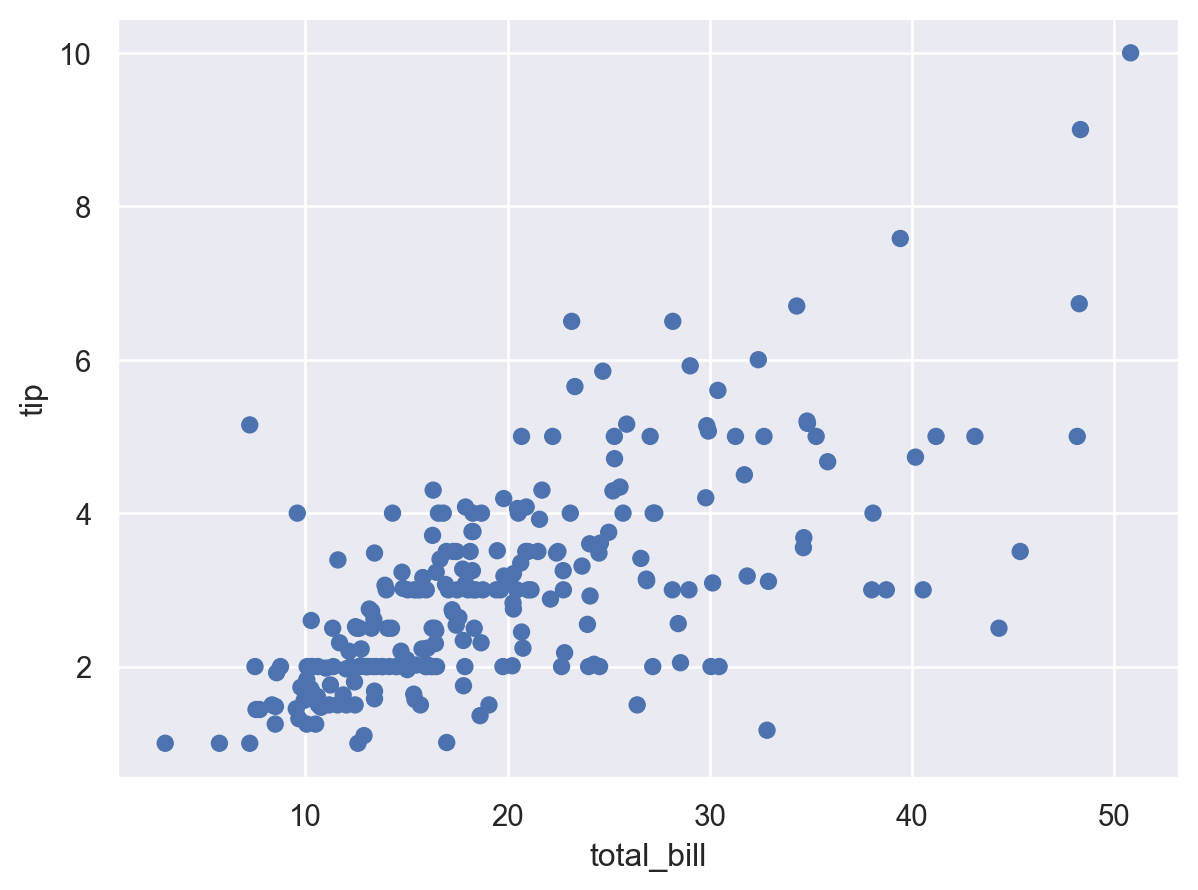

In [10]:
# Graficamos la relacion entre las variables 

(
    so.Plot(data=datos, x='total_bill', y='tip')
    .add(so.Dot())
)

Para visualizar la recta de la regresión, agregamos una línea al gráfico (`so.Line()`) junto a `so.PolyFit(1)`:

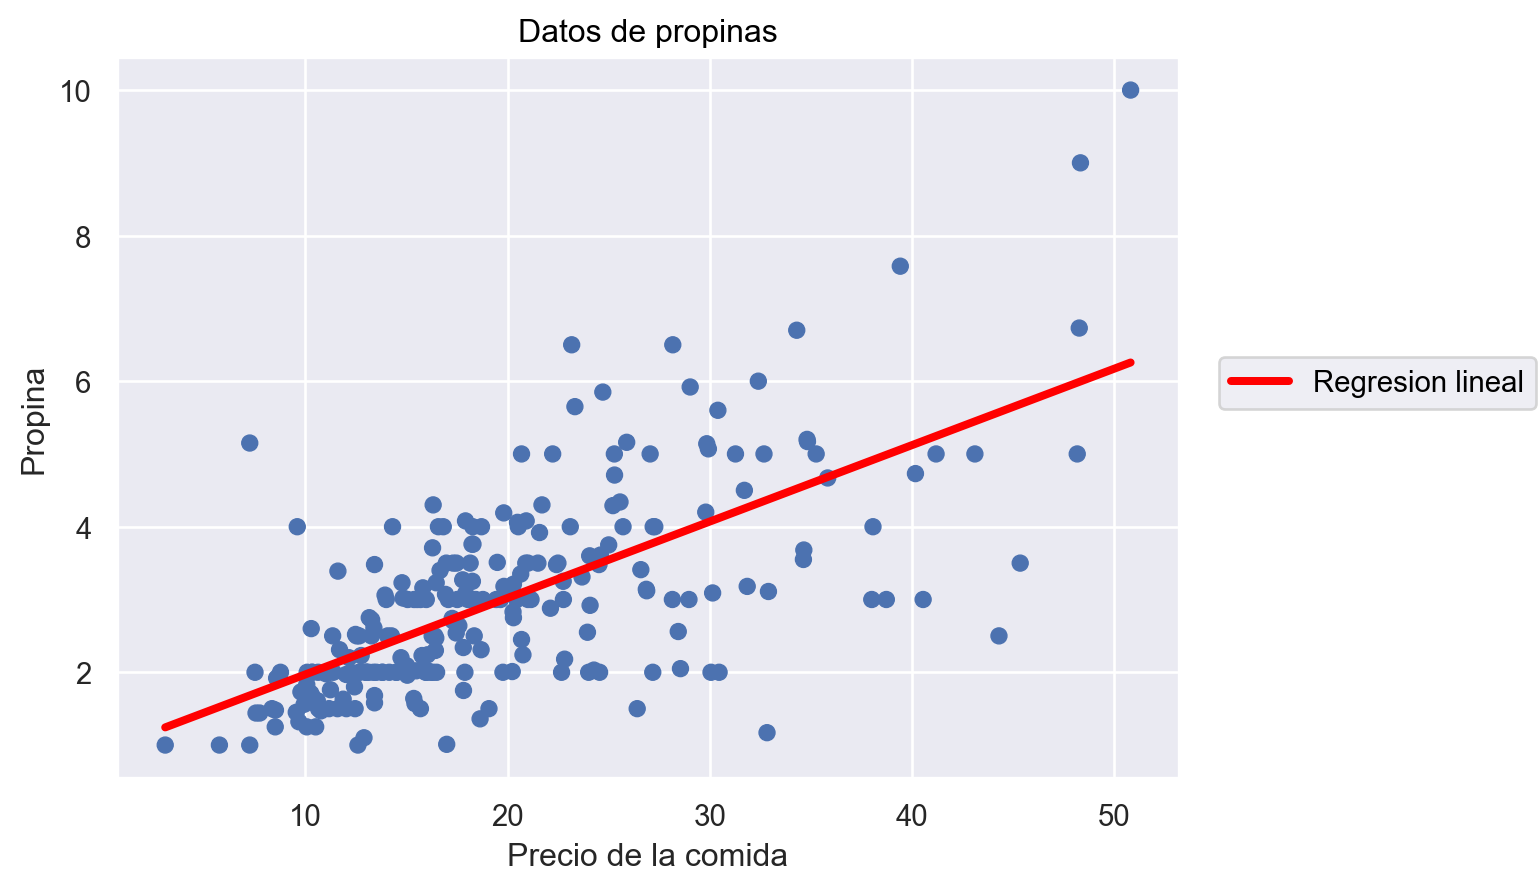

In [11]:
(
    so.Plot(data=datos, x='total_bill', y='tip')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Datos de propinas', x='Precio de la comida', y='Propina')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

### Cálculo de coeficientes y predicciones

Desafortunamente, `seaborn` no nos devuelve los valores de $\beta_0$ y $\beta_1$, que son importantes en la interpretación del resultado.

Hemos visto que podemos calcular los coeficientes de la regresión lineal como:

 $$
 \begin{array}{rl}
      \hat{\beta}_1 = & \dfrac{\displaystyle\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\displaystyle\sum_{i=1}^n(x_i - \bar{x})^2}  \\[1em]
      \hat{\beta}_0 = & \bar{y} - \hat{\beta}_1\bar{x}
 \end{array}
 $$

 pero también podemos utilizar `scikit-learn`:

In [12]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(datos[['total_bill']], datos[['tip']])   # Realizamos el ajuste
beta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
beta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

# O podemos usar .item()
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)


Beta_1:  0.10502451738435337
Beta_0:  0.9202696135546731
Beta_1:  0.10502451738435337
Beta_0:  0.9202696135546731


**MUY IMPORTANTE:** notar los corchetes extra de `datos[['metros_cuad']]` y `datos[['precio']]`. Los doble corchetes hacen que `datos[['precio']]` sea un pandas.Dataframe y no un pandas.Series.

<span style="color:red">**EL MÉTODO .fit() ADMITE DATAFRAMES (O MATRICES), NO ADMITE SERIES (NI ARRAYS). USAR DOBLE CORCHETE.**</span>

In [13]:
display(datos['total_bill'])
type(datos['total_bill'])

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

pandas.core.series.Series

In [14]:
display(datos[['total_bill']])
type(datos[['total_bill']])

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


pandas.core.frame.DataFrame

Entonces, la recta que mejor aproxima a los datos es (redondeando):
$$ Y = 0.92 + 0.105 X$$

Una interpretación que podemos darle a este resultado es que, por cada peso que costó la comida, se dejan de propina 0.105 pesos (o sea, alrededor de 10 centavos)

Con los valores de $\beta_0$ y $\beta_1$ podemos predecir cuanto será la propina según el valor de la comida. Supongamos que queremos predecir la propina que se deja por una cuenta \\$35. Utilizamos el método `predict()` del modelo.

<span style="color:red">**EL MÉTODO .predict() TAMBIEN SOLO ADMITE ADMITE DATAFRAMES (O MATRICES).**</span>

In [17]:
modelo.predict(pd.DataFrame({'total_bill': [35]}))

array([[4.59612772]])

In [19]:
# Para devolver directamente el numero agregamos .item()
modelo.predict(pd.DataFrame({'total_bill': [35]})).item()

4.596127722007041

También podemos hacer directamente la cuenta porque ya sabemos cuanto valen $\beta_1$ y $\beta_0$:

In [20]:
beta_1 * 35 + beta_0

4.596127722007041

Según nuestro modelo, se deberían dejar aproximadamente \\$4.60 de propina. También podemos predecir la propina de una cuenta mayor a cualquiera que las que aparecen en los datos. Por ejemplo, una comida que costó \\$60:

In [22]:
modelo.predict(pd.DataFrame({'total_bill': [60]}))

array([[7.22174066]])

Podemos predecir varios valores de una:

In [23]:
modelo.predict(pd.DataFrame({'total_bill': [35, 60]}))

array([[4.59612772],
       [7.22174066]])

Para que nos devuelva un array de numpy en vez de una matriz, usamos el método `flatten()`:

In [24]:
modelo.predict(pd.DataFrame({'total_bill': [35, 60]})).flatten()

array([4.59612772, 7.22174066])

Esto sirve, por ejemplo, si queremos calcular los valores predichos por el modelo $\hat{y}_i$ :

In [25]:
y_pred = modelo.predict(datos[['total_bill']]).flatten()
display(y_pred)

array([2.70463616, 2.00622312, 3.12683472, 3.40725019, 3.5028225 ,
       3.57633966, 1.84133463, 3.74332864, 2.49983836, 2.47253198,
       1.99887141, 4.6234341 , 2.53974767, 2.85587147, 2.47778321,
       3.1866987 , 2.00517288, 2.631119  , 2.70253567, 3.0890259 ,
       2.80230897, 3.05121707, 2.57650625, 5.06033609, 3.00185555,
       2.79075627, 2.32444741, 2.25303074, 3.19930164, 2.98400138,
       1.92325375, 2.84746951, 2.50193885, 3.09322688, 2.78760553,
       3.4471595 , 2.63321949, 2.69833469, 2.88317784, 4.20438627,
       2.60486287, 2.75399769, 2.38431139, 1.93690694, 4.11301494,
       2.84116804, 3.25496464, 4.32306398, 3.91871958, 2.81491191,
       2.23727706, 2.0009719 , 4.57617306, 1.96421332, 3.60469628,
       2.96719746, 4.91225152, 3.69396712, 2.10074519, 5.98980307,
       3.05121707, 2.3706582 , 2.0776398 , 2.84116804, 2.76765087,
       3.02916192, 2.64792292, 1.24269488, 3.0449156 , 2.49668762,
       2.18266431, 2.71303813, 3.74122815, 3.57528941, 2.46728

O podemos calcular $\hat{y}$ usando los valores de $\beta_1$ y $\beta_0$

In [26]:
y_pred = beta_1 * datos['total_bill'] + beta_0
display(y_pred)

0      2.704636
1      2.006223
2      3.126835
3      3.407250
4      3.502822
         ...   
239    3.969131
240    3.774836
241    3.301175
242    2.791807
243    2.892630
Name: total_bill, Length: 244, dtype: float64

Finalmente, el bueno de `scikit-learn` nos calcula el coeficiente de determinación $R^ 2$: primero van los datos observados ( $y$ ) y luego los datos predichos ( $\hat{y}$ )

In [27]:
y_pred = modelo.predict(datos[['total_bill']])
r2_score(datos[['tip']], y_pred)

0.45661658635167657

De manera análoga podemos calcular el error cuadrático medio (ECM):

In [28]:
mean_squared_error(datos[['tip']], y_pred)

1.036019442011377

In [30]:
#mi predicción está al cuadrado, así que voy a interpertar la raiz de eso.
#Entonces mi modelo pifia aprox por $1.017 la propina que darían.
np.sqrt(mean_squared_error(datos[['tip']], y_pred))

1.0178504025697377